<a href="https://colab.research.google.com/github/RA2112704010029/APPLIED-DEEP-LEARNING-/blob/main/Next_Character_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code tells us how to predict the next character in a text based on the " tiny shakespeare" dataset used

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Sample dataset: Using built-in TensorFlow dataset
import tensorflow_datasets as tfds

dataset_name = "tiny_shakespeare"
dataset = tfds.load(name=dataset_name, split='train')

# Extract text data
text_data = []
for data in dataset.take(15):  # Reduce dataset to only 10-15 words
    text_data.append(data['text'].numpy().decode('utf-8'))

text_corpus = " ".join(text_data)[:100]  # Limit to first 100 characters

# Creating character-level tokenization
tokenizer = Tokenizer(char_level=True, oov_token="<OOV>")  # Character-level tokenization
tokenizer.fit_on_texts([text_corpus])
char_index = tokenizer.word_index
vocab_size = len(char_index) + 1

# Creating character sequences
input_sequences = []
chars = list(text_corpus)
max_seq_length = 10  # Limit sequence length
for i in range(1, len(chars)):
    seq = tokenizer.texts_to_sequences([chars[:i+1]])[0]
    if len(seq) <= max_seq_length:
        input_sequences.append(seq)

# Padding sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre')

# Splitting into X and Y
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# Function to create model
def create_model(model_type):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_seq_length-1),
        model_type(128, return_sequences=False),
        Dense(vocab_size, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])
    return model

# Creating models
rnn_model = create_model(SimpleRNN)
lstm_model = create_model(LSTM)
gru_model = create_model(GRU)

# Training models
def train_model(model, name):
    print(f"\nTraining {name} Model...")
    history = model.fit(X, y, epochs=5, batch_size=8, verbose=1)
    return history

rnn_history = train_model(rnn_model, "RNN")
lstm_history = train_model(lstm_model, "LSTM")
gru_history = train_model(gru_model, "GRU")

# Function to predict next character
def predict_next_char(model, seed_text):
    tokenized_seq = tokenizer.texts_to_sequences([seed_text])[0]
    tokenized_seq = pad_sequences([tokenized_seq], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(tokenized_seq), axis=-1)
    for char, index in char_index.items():
        if index == predicted:
            return char
    return ""

# Testing next-character prediction
seed_text = "To b"
print(f"RNN Prediction: {predict_next_char(rnn_model, seed_text)}")
print(f"LSTM Prediction: {predict_next_char(lstm_model, seed_text)}")
print(f"GRU Prediction: {predict_next_char(gru_model, seed_text)}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.MBFS66_1.0.0/tiny_shakespeare-train.tfrecord*.…

Generating validation examples...:   0%|          | 0/1 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.MBFS66_1.0.0/tiny_shakespeare-validation.tfrec…

Generating test examples...:   0%|          | 0/1 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.MBFS66_1.0.0/tiny_shakespeare-test.tfrecord*..…

Dataset tiny_shakespeare downloaded and prepared to /root/tensorflow_datasets/tiny_shakespeare/1.0.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training RNN Model...
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.1157 - loss: 3.3233
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3472 - loss: 2.3342
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5370 - loss: 1.7510
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4630 - loss: 2.4318
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4630 - loss: 1.4315

Training LSTM Model...
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0000e+00 - loss: 3.3300
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3056 - loss: 3.1950
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3056 - loss: 2.7841 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3472 - loss: 2.3310
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3472 - loss: 2.0359

Training GRU Model...
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0000e+00 - loss: 3.3337
Epoch 2/5
2/2 ━━━━━

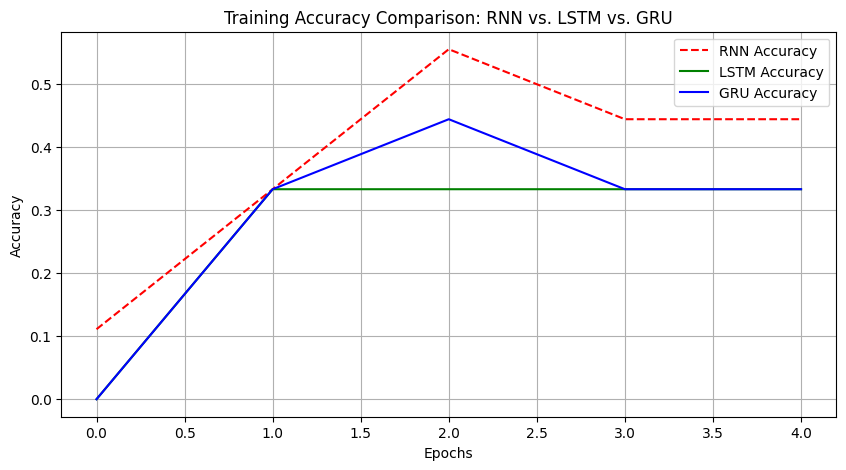

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy', linestyle='dashed', color='r')
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy', color='g')
plt.plot(gru_history.history['accuracy'], label='GRU Accuracy', color='b')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Comparison: RNN vs. LSTM vs. GRU")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Upload ipynb file
from google.colab import files
import subprocess
import os

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Ensure nbconvert is installed
subprocess.run(["pip", "install", "nbconvert"])

# Convert the notebook to HTML
subprocess.run(["jupyter", "nbconvert", file_name, "--to", "html"])

# Define the HTML file name
html_file_name = file_name.replace(".ipynb", ".html")

# Check if the HTML file exists before downloading
if os.path.exists(html_file_name):
    files.download(html_file_name)
else:
    print(f"Error: {html_file_name} not found.")


Saving NextCharacterPrediction_ShreyaVemana.ipynb to NextCharacterPrediction_ShreyaVemana (2).ipynb
Error: NextCharacterPrediction_ShreyaVemana (2).html not found.
